# What's this?

This is an R-notebook. You can combine formatted text and R-code, run the cells and export in various formats.
It consists of cells (text cells and code cells).


- To change the code in a cell, click (cell border turns green) and type away.
- To **run the code** hit \[CTRL\] and \[ENTER\] at the same time

Further keyboard shortcuts:

- H for Help
- \[Esc\] to stop editing
- to add a cell above or below the current, key A or B
- to delete a cell, key D twice

<div class="alert alert-success">
Don't worry, this is your individual copy. If you get totally lost, just revisit the link 'R-notebook'
</div>



In [245]:
require(tidyverse)

<div class="h1">

 Two precious helpers: Pipeline and ggplot

</div>

## Pipeline
 
### Traditionally &hellip; hieroglyph scripts!
<img src="hieroglyphs.png" />

 &hellip; working with R soon resulted in a workspace full of objects: initial dataframes, subsets, intermediate results etc.
 
- hard to remember which is which when returning to your analysis over a couple of weeks
- hard to reproduce for others
- easy to forget to update all necessary nodes when input data change

### enter 2013: the pipe operator

<img src="pipe-op-1.png" width="500px" />

The pipe operator made things much easier. With this operator, we can string a variety of operations into one concise chain.

- ideally only one input and one output = no side effects messing up the workspace
- concise, readable, reproducible

### 2021 <sup>probably</sup>: a pipe operator will become part of base R 🔥

The concept became so popular that the pipe operator will become part of base R in its oncoming version.




### this is the pipe operator: %>%
### you insert it this way

<img src="hand.png" width="50%" />
M as in <strong>M</strong>argritte:
<img src="pipe.jpg" width="20%" />



### Practise

In [12]:
head(iris, 1) ## traditional

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa


In [14]:
iris %>% head(.,1) ## the dot represents the incoming dataframe
iris %>% head(1) ## but normally you don't even have to explicit it

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa


### Useful pipe operations &hellip;
#### filter:

show first entry of all obs. with sepals > 6

In [182]:
?subset

In [183]:
iris["Sepal.Length" > 6, ][1,] ## traditional indexing
## subset(iris, Sepal.Length > 6)[1,] # using subset

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa


In [28]:
## becomes:
iris %>%
    filter(Sepal.Length > 6) %>%
    head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,7,3.2,4.7,1.4,versicolor


^^^ in fact, this pipeline takes is more verbose than traditional indexing. However, it is more expressive about what's happening in which order.

In [32]:
## more conditions
iris %>%
    filter(Sepal.Length > 6, Species == "versicolor") %>%
    head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,7,3.2,4.7,1.4,versicolor


<big>✍️</big>   **Which Starwars characters have blue eyes?**

- dataset: starwars
- *glimpse* gives an overview over variables and values
- filter filters the desired variable for a given set of values
- *select* selects variables (the whole dataframe is quite broad)

#### summarise:

In [34]:
iris %>%
    summarise(
            observation_count = n(),
            mean_sepal_length = mean(Sepal.Length)
    )

observation_count,mean_sepal_length
<int>,<dbl>
150,5.843333


In [80]:
## summarise only numeric variables
iris %>%
    summarise(across(where(is.numeric), ## select numeric vars
                     mean, na.rm=TRUE)
             )

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<dbl>,<dbl>,<dbl>,<dbl>
5.843333,3.057333,3.758,1.199333


In [75]:
## summarise only petal data with "fivenums" = 0-4th quartile
iris %>%
    summarise(across(starts_with("Sepal"),fivenum),
              names = paste0(0:4, "th quartile")
    )

Sepal.Length,Sepal.Width,names
<dbl>,<dbl>,<chr>
4.3,2.0,0th quartile
5.1,2.8,1th quartile
5.8,3.0,2th quartile
6.4,3.3,3th quartile
7.9,4.4,4th quartile


#### mutate:

In [94]:
iris %>%
    mutate (
            Species = paste("species",Species, sep=": "),
            Double_Sepal_Length = 2 * Sepal.Length
           ) %>% head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Double_Sepal_Length
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,5.1,3.5,1.4,0.2,species: setosa,10.2


#### group:

In [102]:
iris %>%
    group_by(Species) %>%
    summarise(obs_per_species = n(),
             broad_sepals = sum(Sepal.Width > 3)
    )

`summarise()` ungrouping output (override with `.groups` argument)



Species,obs_per_species,broad_sepals
<fct>,<int>,<int>
setosa,50,42
versicolor,50,8
virginica,50,17


#### reshape

**Reshaping from wide (usually from spreadsheet data) to long format is an important step in data preparation**
- it facilitates grouped analysis, from simple summarising to nested models
- it prepares the ground for facetted plotting)

Preview the iris dataset (again): it's in *wide* format: one variable along each other. This is the format typically used with spreadsheet software.

In [118]:
iris %>% head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa


Sepal length, petal width etc. can be seen as categories of a joint variable "flower dimension" rather than separate variables. Let's gather these under a common variable:

In [141]:
iris %>%
    mutate (id = row_number()) %>%
    pivot_longer(cols = -c(id,Species),
                names_to = "dimension",
                values_to = "measured value") %>%
    sample_n(3) ## sample five obs (don't print the whole thing)

Species,id,dimension,measured value
<fct>,<int>,<chr>,<dbl>
setosa,37,Petal.Width,0.2
setosa,39,Petal.Width,0.2
virginica,142,Sepal.Length,6.9


The dataframe in *long* format is easier to process for most types of dataframe operations:

In [153]:
iris %>%

    mutate (id = row_number()) %>%
    pivot_longer(cols = -c(id,Species),
                names_to = "dimension",
                values_to = "measured value") %>%

    group_by (Species, dimension) %>% 
    summarise(mean = mean(`measured value`, na.rm = TRUE)) %>% ## note the backticks
    ungroup %>% ## what would happen with the dataframe still grouped?
    sample_n(3) 

`summarise()` regrouping output by 'Species' (override with `.groups` argument)



Species,dimension,mean
<fct>,<chr>,<dbl>
versicolor,Petal.Width,1.326
setosa,Sepal.Length,5.006
setosa,Petal.Width,0.246


<big>✍️</big>   **Which species from the iris dataset have a correlation between petal and sepal lengths > 0.6?**

- group_by groups data
- cor() returns the correlation coeff
- filter filters

<big>✍️</big>   **What's the most common eye color among Starwars characters?**

- group_by groups data
- *n()* counts rows
- *arrange*(vars) sorts a data frame
- *arrange*(desc(vars)) reverse sorts a data frame
- *top_n(n, vars)* / *top_frac(x, vars)* return rows with top values of vars

 <div class="h1">

ggplot

</div>

**<a href="" target="_blank">ggplot</a>** is a visualisation package for R. (It was developed by the <a href="https://en.wikipedia.org/wiki/Hadley_Wickham" target="_blank">same guy</a> as the pipe operator.)
ggplot is probably the most popular plot package for R. It will handle all types of plots, and there's a still growing zoo of <a href="https://exts.ggplot2.tidyverse.org/gallery/" target="">extensions</a> which all share the same *grammar*: you only have to learn it once.

<blockquote class="blockquote">
  <p>I probably haven't used any R plot tools other than ggplot (and extensions) for ten years. </p>
</blockquote>




## What's different about ggplot?

- A ggplot is composed from elements, like a sentenced is composed from words (of different type), following a grammar.
- These elements are combined with '+' but this is not an algebraic '+' as normally in R

### main elements

- data (of course)
- mapping of data values to aesthetics (e.g.: x/y-position, colour, bubble size)
- geom = the plot geometry (scatter, box, line, violin &hellip;)

#### further elements
- axes (type, style)
- coordinate system
- facets

^^^ further elements can be specified to fine-tune the chart. If not, they are replaced with sensible default.


In [241]:
options(repr.plot.width=3, repr.plot.height=3) ## a hack to reduce plot size in this notebook

## Constructing a ggplot

<span class="badge">1</span> feed the data, preferably via the pipe:
<pre>
iris %>%
    ggplot()
</pre>
&hellip; nothing happens: ggplot doesn't know yet, which kind of plot (geom) to produce, or which variables to map to which aesthetics (aes) = things you can see in the plot

<span class="badge">2</span> choose aesthetics and plot type

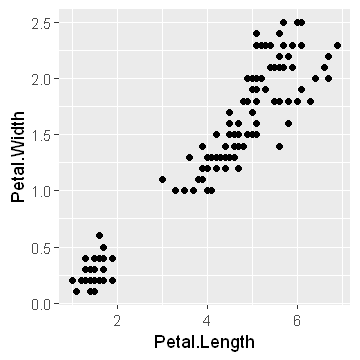

In [199]:
iris  %>%
    ggplot() + ## remember: plot elements are combined with '+'
        aes(Petal.Length, Petal.Width) + ## for brevity, you can include the aes in the ggplot call
        geom_point()

<span class="badge">3</span> refine as desired

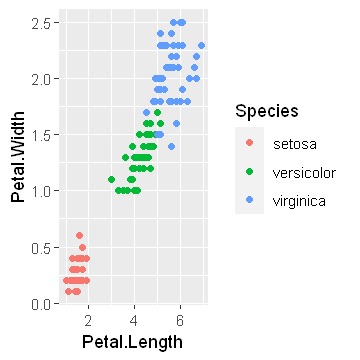

In [201]:
last_plot() + ## last_plot() recalls the previous plot produced
    aes(color = Species) 

### Examples

You can layer your plots:

In [208]:
myPlot <- ## save the partial plot object
iris %>%
    ggplot(aes(Petal.Length, Petal.Width))

`geom_smooth()` using formula 'y ~ x'



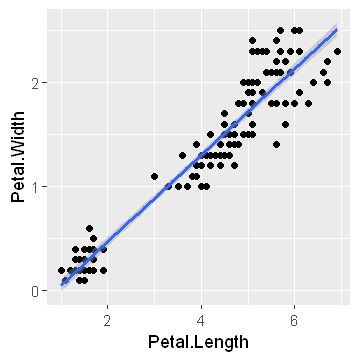

In [211]:
myPlot +
    geom_point() + ## a scatterplot layer
    geom_smooth(method = "lm") ## a line layer

You can add separate data to plot layers:

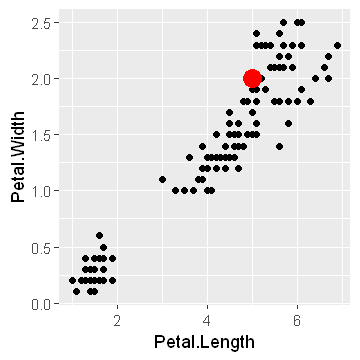

In [214]:
myPlot +
    geom_point() +
    geom_point(data = data.frame(x=5, y=2),
               aes(x,y),
               color = "red", size = 5
    )

What about one plot per Species? (Such "small multiples" often improve chart legibility)

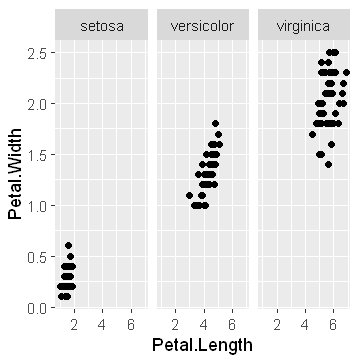

In [217]:
myPlot +
    geom_point() +
    facet_wrap(~ Species)

Warning message:
"Removed 6 rows containing non-finite values (stat_boxplot)."


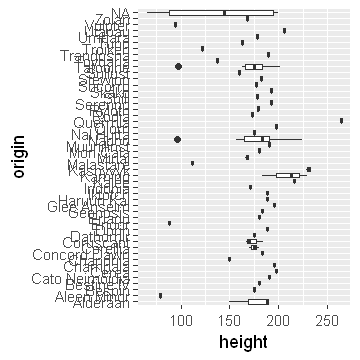

In [237]:
starwars %>%
    ggplot(aes(homeworld,height)) +
        geom_boxplot() +
        coord_flip() + ## flip axes
        labs(x="origin", "body height")

Where's Luke?

Warning message:
"Removed 6 rows containing non-finite values (stat_boxplot)."


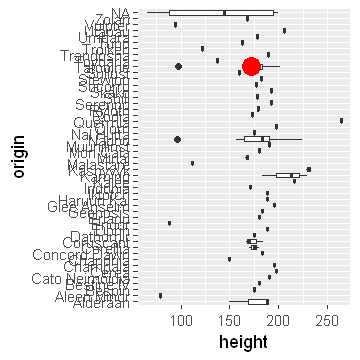

In [240]:
last_plot() +
    geom_point(data = starwars %>%
                      filter(grepl("*Luke*", name)),
              col = "red", size=5)

exporting:

In [244]:
ggsave("test.svg", height=5, width=10) ## export format recognized from extensiono

Saving 6.67 x 6.67 in image

Warning message:
"Removed 6 rows containing non-finite values (stat_boxplot)."


 <div class="h1">

How to move on?

</div>

- ggplot and extensions should provide chart types for almost every use.
- ggplot <a href="https://www.htmlwidgets.org/" target="_blank">cheatsheets</a> help to get familiar with the package
- for interactive online charts, dashboards etc. consider:
   - <a href="https://www.htmlwidgets.org/" target="_blank">htmlwidgets for R</a>, especially plotly and leaflet (for maps)
   - <a href="https://shiny.rstudio.com/" target="_blank">Shiny</a> (integrates with RStudio)
- Finetuning beyond ggplot's capabilities is easy with dedicated software (export as SVG and edit, e.g. with open source free Inkscape)